""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"
    by RH Landau, MJ Paez, and CC Bordeianu (deceased)
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2020. 
    Please respect copyright & acknowledge our work."""

# HeatCrankNiclson.ipynb
    
 
    
    <center><h2>Heat Equation</h2></center>
<pre>
</pre>
Heat equation:
$$\frac{\partial T(x,t)}{\partial t}=\frac{K}{C\rho}\frac{\partial^2T(x,t)}{\partial x^2}$$
Constants characteristics of the material are K: thermal conductivity, C: heat Capacity,$\rho$: density.

This equation is solved here using the Crank-Nicolson method.

In [1]:
#from __future__ import division,print_function
#from IPython.display import IFrame
from numpy import *
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pylab as p
from mpl_toolkits.mplot3d import Axes3D ;

In [3]:

Max = 51; n   = 50;   m = 50
Ta  = zeros( (Max), float );  Tb  = zeros( (Max), float ); Tc  = zeros((Max), float)
Td  = zeros( (Max), float );  a   = zeros( (Max), float ); b   = zeros( (Max), float)
c   = zeros( (Max), float );  d   = zeros( (Max), float ); x   = zeros( (Max), float)
t   = zeros( (Max, Max), float )

def Tridiag(a, d, c, b, Ta, Td, Tc, Tb, x, n):                # Define Tridiag method
    Max = 51
    h = zeros( (Max), float )
    p = zeros( (Max), float )
    for i in range(1,n+1):
        a[i] = Ta[i]
        b[i] = Tb[i]
        c[i] = Tc[i]
        d[i] = Td[i]
    h[1] = c[1]/d[1]
    p[1] = b[1]/d[1]
    for i in range(2,n+1):
        h[i] = c[i] / (d[i]-a[i]*h[i-1])
        p[i] = (b[i] - a[i]*p[i-1]) / (d[i]-a[i]*h[i-1])
    x[n] = p[n]
    for i in range( n - 1, 1,-1 ): x[i] = p[i] - h[i]*x[i+1]

Finished


<IPython.core.display.Javascript object>


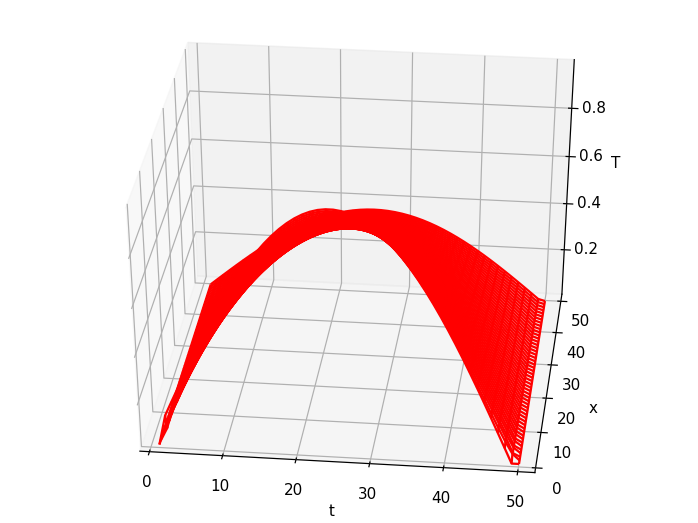

In [4]:
width = 1.0; height = 0.1; ct = 1.0                                 # Rectangle W & H
for i in range(0, n):   t[i,0] = 0.0                                     # Initialize
for i in range( 1, m):  t[0][i] = 0.0
h  = width  / ( n - 1 )                            # Compute step sizes and constants
k  = height / ( m - 1 )
r  = ct * ct * k / ( h * h )

for j in range(1,m+1):
    t[1,j] = 0.0
    t[n,j] = 0.0                                                               # BCs
for i in range( 2, n):   
    t[i][1] = sin( pi * h *i)                                                   # ICs
for i in range(1, n+1):  
    Td[i] = 2. + 2./r
Td[1] = 1.
Td[n] = 1.
for i in range(1,n ): Ta[i] = -1.0;      Tc[i] = -1.0;                 # Off diagonal
Ta[n-1] = 0.0;   Tc[1] = 0.0; Tb[1] = 0.0; Tb[n] = 0.0

for j in range(2,m+1):
    for i in range(2,n): 
        Tb[i] = t[i-1][j-1] + t[i+1][j-1] + (2/r-2) * t[i][j-1]
    Tridiag(a, d, c, b, Ta, Td, Tc, Tb, x, n)                        # Solve system
    for i in range(1, n+1):  
        t[i][j] = x[i]
print("Finished")
x = list(range(1, m+1))                                          # Plot every other x point
y = list(range(1, n+1))                                               # every other y point
X, Y = p.meshgrid(x,y)               

def functz(t):                                           # Function returns potential
    z = t[X, Y]                 
    return z
Z = functz(t)                          
fig = p.figure()                                                      # Create figure
ax = Axes3D(fig)                                                      # plots axes
ax.plot_wireframe(X, Y, Z, color= 'r')                                # red wireframe
ax.set_xlabel('t')                                                       # label axes
ax.set_ylabel('x')
ax.set_zlabel('T')
p.show()             

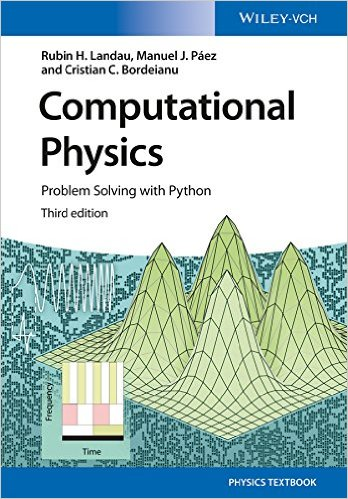

In [5]:
from IPython.display import Image
Image(filename='Documents/wiley3rd.png')